# Cooperativity

$$g = \gamma_e x_{zpf} G_m$$

$$C=\frac{g^2}{\Gamma \kappa \bar{n}_{th}}$$

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


## 3D dipole model

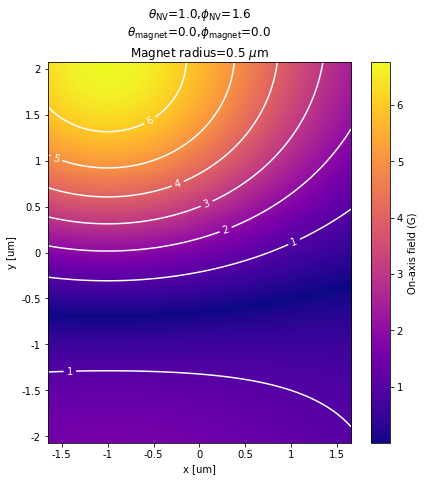

In [5]:
def dipole(x, y, z, m_theta, m_phi, nv_theta, nv_phi, m_loc_x, m_loc_y, b0):
    ny, nx = np.shape(x)
    z = np.array([[z for i in range(nx)] for j in range(ny)])
    r = np.array([x-m_loc_x, y-m_loc_y, z])
    m_prefactor = b0*4/3*np.pi*radius**3
    mx,my,mz = np.sin(m_theta)*np.cos(m_phi),np.sin(m_theta)*np.sin(m_phi),np.cos(m_theta)
    m = m_prefactor* np.array([np.tile(mx,(ny,nx)), np.tile(my,(ny,nx)), np.tile(mz,(ny,nx))])
    m_dot_r = np.sum(r*m,axis=0)
    r_abs = np.sqrt(np.sum(r*r,axis=0))
    field = 1/(4*np.pi)*((3*r*m_dot_r)/np.power(r_abs,5)- m/np.power(r_abs,3))
    nvx,nvy,nvz = np.sin(nv_theta)*np.cos(nv_phi),np.sin(nv_theta)*np.sin(nv_phi),np.cos(nv_theta)
    nvx_array, nvy_array, nvz_array = np.tile(nvx,(ny,nx)), np.tile(nvy,(ny,nx)), np.tile(nvz,(ny,nx))
    nv = np.array([nvx_array, nvy_array, nvz_array])
    field_nv = np.sum(field*nv,axis=0)*1e4
    return np.abs(field_nv)

radius = .5e-6
m_dir = np.array([0,0])
nv_dir = np.array([np.pi*55/180,np.pi*90/180])
m_loc = np.array([-1,1])*1e-6

xmin, xmax, nx = -1.65e-6, 1.65e-6, 400
ymin, ymax, ny = -2.07e-6, 2.07e-6, 400
x, y = np.linspace(xmin, xmax, nx), np.linspace(ymin, ymax, ny)
X, Y = np.meshgrid(x, y)

Z = dipole(X,Y,4e-6,*m_dir,*nv_dir,*m_loc, 0.7)
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

im = ax.imshow(Z, origin='bottom', cmap='plasma',
          extent=(x.min(), x.max(), y.min(), y.max()))
cont = ax.contour(X, Y, Z, colors='w')
plt.clabel(cont,fmt='%.0f')

cbar = fig.colorbar(im, orientation='vertical')
cbar.set_label('On-axis field (G)')
nv_dir_norm = nv_dir/np.linalg.norm(nv_dir)
ax.set_title(r'$\theta_{{\mathrm{{NV}}}}$={:.1f},$\phi_{{\mathrm{{NV}}}}$={:.1f}' '\n' 
             r'$\theta_{{\mathrm{{magnet}}}}$={:.1f},$\phi_{{\mathrm{{magnet}}}}$={:.1f}' '\n' 
             r'Magnet radius={:.1f} $\mu$m'
             .format(*nv_dir,*m_dir,radius*1e6))
ticks = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x*1e6))
ax.xaxis.set_major_formatter(ticks);ax.yaxis.set_major_formatter(ticks)
ax.set_xlabel('x [um]');ax.set_ylabel('y [um]')
plt.show()